<a href="https://colab.research.google.com/github/monicafar147/regression-predict-api-template/blob/Monica/Zindi_challenge_ct_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   make sure you are working in your own branch that you cloned from git
*   to commit your notebook changes to git:
1.   file
2.   save a copy in github
3.   choose your branch from branches dropdown
4.   change commit message to what you did e.g. "fixed dataframe indexes"
5.   click ok





#Data Preprocessing

##Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importing the dataset

In [0]:
df_train = pd.read_csv('Train.csv')
df_riders = pd.read_csv('Riders.csv')

In [3]:
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
df_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


## Summary statistics

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

At this stage, we notice that there are missing values from `Temperature` and `Precipitation in millimeters`. We also need to convert all the columns that contain time information from objects to a datetime format.

In [6]:
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


It can be seen that there are no missing data in the riders data.

## Taking care of missing data

As described above, there are null-values present in the `Temperature` and `Precipitation in millimeters` columns.

We would be able to fill the missing `Temperature` values with values from the same dates where measurements were taken, but we don't know the actual date of each measurement. The easiest option would be to fill the missing values with the average of the column, but we should find a better way of doing this.

We are assuming that if `Precipitation in millimeters` is missing, that it was not raining on that day. We can therefore fill null values with 0.

In [0]:
# Fill missing precipitation values with 0
df_train['Precipitation in millimeters'] = df_train['Precipitation in millimeters'].fillna(value=0)

# Fill missing temperature values with averages
df_train['Temperature'] = df_train['Temperature'].fillna(df_train['Temperature'].mean())

## Fixing data types

The various columns that represent a time of day need to be converted to a datetime format.

In [0]:
df_train['Placement - Time'] = pd.to_datetime(df_train['Placement - Time']).dt.time
df_train['Confirmation - Time'] = pd.to_datetime(df_train['Confirmation - Time']).dt.time
df_train['Arrival at Pickup - Time'] = pd.to_datetime(df_train['Arrival at Pickup - Time']).dt.time
df_train['Pickup - Time'] = pd.to_datetime(df_train['Pickup - Time']).dt.time
df_train['Arrival at Destination - Time'] = pd.to_datetime(df_train['Arrival at Destination - Time']).dt.time

## Dropping columns

In [9]:
df_train['Vehicle Type'].unique()

array(['Bike'], dtype=object)

The `Vehicle Type` column only contains one value - Bike. This is redundant info, therefore we can drop this column.

In [0]:
df_train.drop(['Vehicle Type'], axis=1, inplace = True)

## Merge Train.csv with Riders.csv

In [11]:
merged_df = df_train.merge(df_riders, on='Rider Id')
merged_df.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,15:41:17,18,5,15:41:30,18,5,16:07:16,18,5,16:13:37,18,5,17:01:43,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41,31,5,13:12:49,31,5,13:20:02,31,5,13:33:08,31,5,14:16:43,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,07:12:10,2,2,07:12:29,2,2,07:35:24,2,2,07:38:46,2,2,08:28:32,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58,22,2,10:42:24,22,2,10:56:00,22,2,10:59:40,22,2,11:26:22,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


In [12]:
#replace strings with underscore notation for PEP8 standards
merged_df.columns = [col.replace(" ","_") for col in merged_df.columns]
merged_df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,15:41:17,18,5,15:41:30,18,5,16:07:16,18,5,16:13:37,18,5,17:01:43,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41,31,5,13:12:49,31,5,13:20:02,31,5,13:33:08,31,5,14:16:43,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,07:12:10,2,2,07:12:29,2,2,07:35:24,2,2,07:38:46,2,2,08:28:32,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58,22,2,10:42:24,22,2,10:56:00,22,2,10:59:40,22,2,11:26:22,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


In [0]:
# reorder columns so that y is the last column
column_titles = [col for col in merged_df.columns if col!= 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
merged_df  = merged_df.reindex(columns=column_titles)

# Set independent and dependent variables
X = merged_df.iloc[:, :-1]
y = merged_df.iloc[:, -1]

## Encoding categorical data

### Encoding the Independent Variable

####Encoding using One Hot Encoding


In [0]:
encoded_X = pd.get_dummies(X)
encoded_X.head()

### Encoding the Dependent Variable

The dependent variable is the time in seconds between 'Pickup' and 'Arrival at Destination'.

The data does not need to be encoded.

## Feature Scaling

The spread of the dependent variable before scaling.

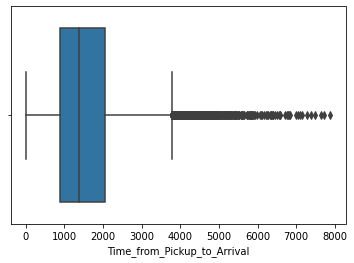

In [18]:
sns.boxplot(y)

In [25]:
encoded_X.head()

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Order_No_Order_No_1,Order_No_Order_No_10,Order_No_Order_No_100,Order_No_Order_No_1000,Order_No_Order_No_10000,Order_No_Order_No_10002,Order_No_Order_No_10004,Order_No_Order_No_10005,Order_No_Order_No_10006,Order_No_Order_No_10007,Order_No_Order_No_10008,Order_No_Order_No_10009,Order_No_Order_No_1001,Order_No_Order_No_10011,Order_No_Order_No_10013,Order_No_Order_No_10014,Order_No_Order_No_10016,Order_No_Order_No_10019,...,Rider_Id_Rider_Id_925,Rider_Id_Rider_Id_926,Rider_Id_Rider_Id_927,Rider_Id_Rider_Id_928,Rider_Id_Rider_Id_929,Rider_Id_Rider_Id_93,Rider_Id_Rider_Id_930,Rider_Id_Rider_Id_931,Rider_Id_Rider_Id_932,Rider_Id_Rider_Id_933,Rider_Id_Rider_Id_934,Rider_Id_Rider_Id_935,Rider_Id_Rider_Id_936,Rider_Id_Rider_Id_937,Rider_Id_Rider_Id_938,Rider_Id_Rider_Id_939,Rider_Id_Rider_Id_94,Rider_Id_Rider_Id_940,Rider_Id_Rider_Id_941,Rider_Id_Rider_Id_942,Rider_Id_Rider_Id_943,Rider_Id_Rider_Id_944,Rider_Id_Rider_Id_946,Rider_Id_Rider_Id_947,Rider_Id_Rider_Id_948,Rider_Id_Rider_Id_949,Rider_Id_Rider_Id_95,Rider_Id_Rider_Id_950,Rider_Id_Rider_Id_951,Rider_Id_Rider_Id_952,Rider_Id_Rider_Id_953,Rider_Id_Rider_Id_954,Rider_Id_Rider_Id_955,Rider_Id_Rider_Id_956,Rider_Id_Rider_Id_958,Rider_Id_Rider_Id_959,Rider_Id_Rider_Id_96,Rider_Id_Rider_Id_97,Rider_Id_Rider_Id_98,Rider_Id_Rider_Id_99
0,3,9,5,9,5,9,5,9,5,9,5,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,18,5,18,5,18,5,18,5,18,5,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,1637,1309,13.8,549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,31,5,31,5,31,5,31,5,31,5,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,1637,1309,13.8,549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2,2,2,2,2,2,2,2,2,2,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,1637,1309,13.8,549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,22,2,22,2,22,2,22,2,22,2,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,1637,1309,13.8,549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Dunyiswa

#Monica

1. replace strings with underscore notation for PEP8 standards

```
merged_df.columns = [col.replace(" ","_") for col in merged_df.columns]
merged_df.head()
```

2. Encoding using one hot encoder

```
encoded_df = pd.get_dummies(merged_df)
encoded_df.head()
```

3. Box plots of y data 







#Monique

#Rachel

#Wright